In [1]:
#EE 219 Project 2 (a) & (e) - (j)
#Author: Zhengshuang Ren
#Date: Feb 11, 2017

import pandas as pd
import numpy as np
import scipy as scipy
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

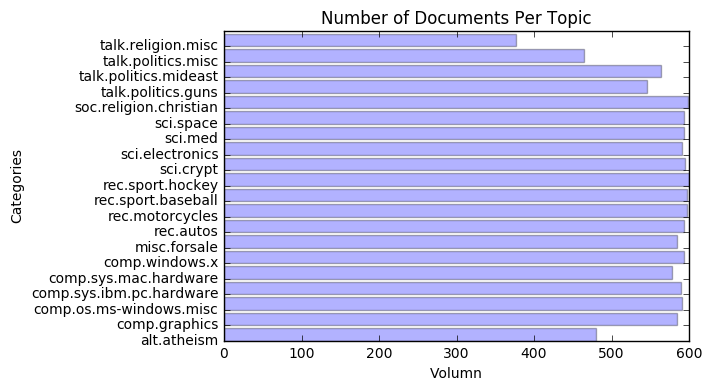

In [2]:
#Problem (a)
#All Categories
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

targ_list = list(twenty_train.target)
cat_list = []
num_docs_list = []
for targ in np.unique(targ_list):
    cat_list.append(twenty_train.target_names[targ])
    num_docs_list.append(targ_list.count(targ))
y_pos = np.arange(len(num_docs_list))
plt.barh(y_pos, num_docs_list, facecolor='b', alpha=0.3) 
plt.yticks(y_pos, cat_list)
plt.title('Number of Documents Per Topic')
plt.xlabel('Volumn')
plt.ylabel('Categories')
plt.show()

The number of topic {comp.graphics} is: 584
The number of topic {comp.os.ms-windows.misc} is: 591
The number of topic {comp.sys.ibm.pc.hardware} is: 590
The number of topic {comp.sys.mac.hardware} is: 578
The number of topic {rec.autos} is: 594
The number of topic {rec.motorcycles} is: 598
The number of topic {rec.sport.baseball} is: 597
The number of topic {rec.sport.hockey} is: 600


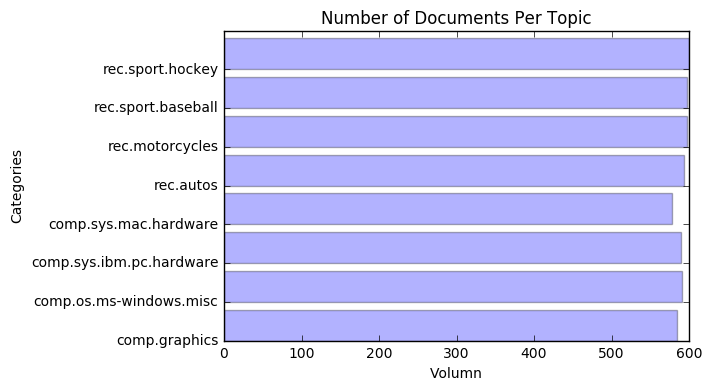

In [3]:
# Comp. and rec. categories
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
               'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
cat_list = []
num_docs_list = []
targ_list = list(twenty_train.target)
for targ in np.unique(targ_list):
    cat_list.append(twenty_train.target_names[targ])
    num_docs_list.append(targ_list.count(targ))
    print ('The number of topic {' + twenty_train.target_names[targ] +'} is: ' + str(num_docs_list[targ]))
y_pos = np.arange(len(num_docs_list))
plt.barh(y_pos, num_docs_list, facecolor='b', alpha=0.3) 
plt.yticks(y_pos, cat_list)
plt.title('Number of Documents Per Topic')
plt.xlabel('Volumn')
plt.ylabel('Categories')
plt.show()

In [4]:
# Helper functions and imports
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import re
import nltk 
import string
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

stop_words = text.ENGLISH_STOP_WORDS
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
    
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #plt.text(j, i, cm[i, j],
        plt.text(j, i, float("{0:.2f}".format(cm[i,j])),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
# Datas
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
               'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english', decode_error='ignore')
X_train = vectorizer.fit_transform(twenty_train.data)
X_test = vectorizer.transform(twenty_test.data)
k = 50
U_k,S_k,V_k = scipy.sparse.linalg.svds(X_train.T,k = k)
train_LSI= (U_k.T * X_train.T).T
test_LSI = (U_k.T * X_test.T).T
train_target_group = [ int(x / 4) for x in twenty_train.target]
test_target_group = [ int(x / 4) for x in twenty_test.target]

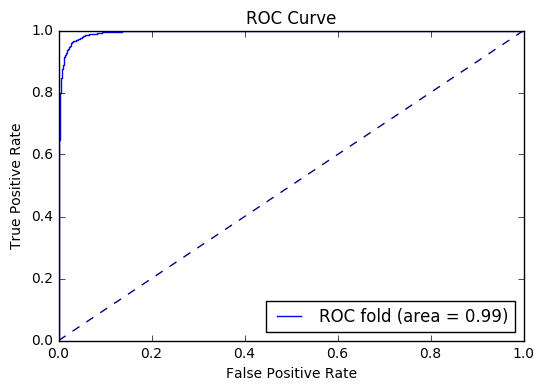

In [6]:
# Problem (e)
svc = SVC()
svc.fit(train_LSI, train_target_group) 
svc_predicted = svc.predict(test_LSI)
# ROC Curve
y_score_test_svc = svc.decision_function(test_LSI)
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_svc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

Confusion matrix, without normalization
[[1461   99]
 [  21 1569]]
Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.01  0.99]]


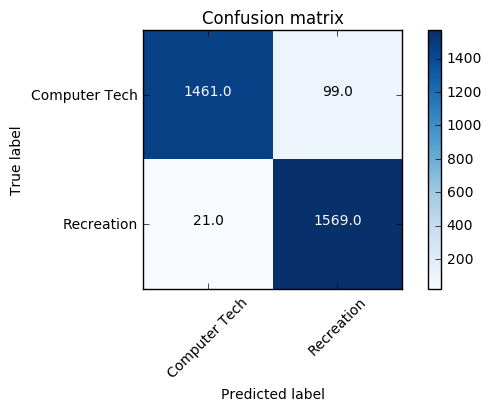

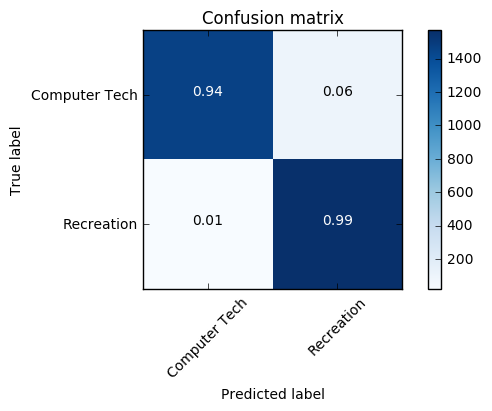

In [7]:
# confusion_matrix for SVC
cm = confusion_matrix(test_target_group, svc_predicted)
classes = ['Computer Tech', 'Recreation']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues)
plt.show()

In [8]:
# Scores for SVC
svc_accuracy = accuracy_score(test_target_group, svc_predicted)
print ('Accuracy: ' + str(svc_accuracy))
svc_precision_score = precision_score(test_target_group, svc_predicted)
print ('Precision score: ' + str(svc_precision_score))
svc_recall_score = recall_score(test_target_group, svc_predicted)
print ('Recall score: ' + str(svc_recall_score))

Accuracy: 0.961904761905
Precision score: 0.940647482014
Recall score: 0.98679245283


In [10]:
# Problem (f)
f5 = KFold(len(twenty_train.data), n_folds=5, shuffle=True, random_state=None)
scores = [[0 for x in range(7)] for y in range(5)] 
trial = [-3, -2, -1, 0, 1, 2, 3]
i = 0
j = 0
for train_index, test_index in f5:
    X_train, X_test = train_LSI[train_index], train_LSI[test_index]
    for gamma in trial:
        X_train_target_group = [ int(x / 4) for x in twenty_train.target[train_index]]
        X_test_target_group = [ int(x / 4) for x in twenty_train.target[test_index]]
        soft_svc = SVC(C=10**(-gamma))
        soft_svc.fit(X_train, X_train_target_group)
        scores[i][j] = soft_svc.score(X_test, X_test_target_group)
        j = j + 1
    i = i + 1
    j = 0

In [11]:
for i in range (7):
     print('When gamma = ' + str(trial[i]) + ', score = ' + str(np.mean(np.array(scores)[:,i])))

When gamma = -3, score = 0.975063793307
When gamma = -2, score = 0.974429320587
When gamma = -1, score = 0.972315825428
When gamma = 0, score = 0.958577772023
When gamma = 1, score = 0.492175803863
When gamma = 2, score = 0.492175803863
When gamma = 3, score = 0.492175803863


Confusion matrix, without normalization
[[1514   46]
 [  29 1561]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


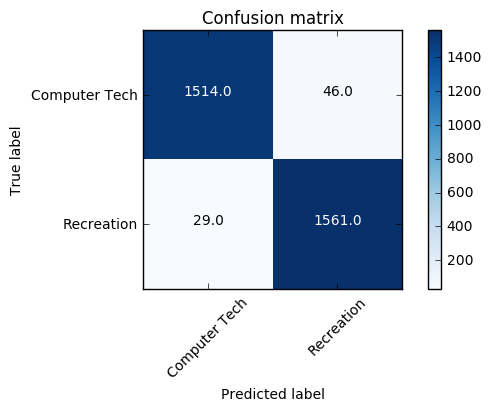

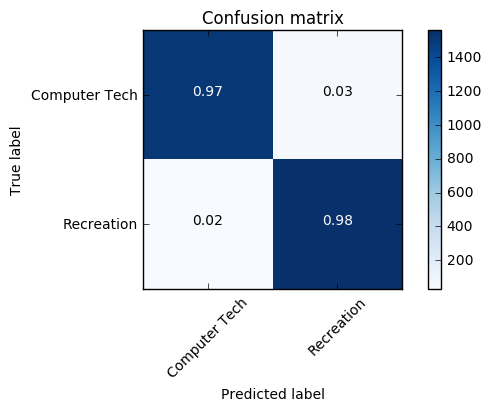

In [13]:
# confusion_matrix for SVC
cm = confusion_matrix(test_target_group, soft_svc_predicted)
classes = ['Computer Tech', 'Recreation']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues)
plt.show()

In [14]:
# Scores for SVC
soft_svc_accuracy = accuracy_score(test_target_group, soft_svc_predicted)
print ('Accuracy: ' + str(soft_svc_accuracy))
soft_svc_precision_score = precision_score(test_target_group, soft_svc_predicted)
print ('Precision score: ' + str(soft_svc_precision_score))
soft_svc_recall_score = recall_score(test_target_group, soft_svc_predicted)
print ('Recall score: ' + str(soft_svc_recall_score))

Accuracy: 0.97619047619
Precision score: 0.971375233354
Recall score: 0.981761006289


In [ ]:
# Problem (g)
# Naive bayes
nb_clf = GaussianNB()
#nb_clf = MultinomialNB()
nb_clf.fit(train_LSI, train_target_group)
nb_predicted = nb_clf.predict(test_LSI)

y_score_test_nb = nb_clf.predict_proba(test_LSI)[:,1]
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_nb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# confusion_matrix for NB
cm = confusion_matrix(test_target_group, nb_predicted)
classes = ['Computer Tech', 'Recreation']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=True,title='Confusion matrix',cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Scores for NB
nb_accuracy = accuracy_score(test_target_group, nb_predicted)
print ('Accuracy: ' + str(nb_accuracy))
nb_precision_score = precision_score(test_target_group, nb_predicted)
print ('Precision score: ' + str(nb_precision_score))
nb_recall_score = recall_score(test_target_group, nb_predicted)
print ('Recall score: ' + str(nb_recall_score))

In [ ]:
# Problem (h)
# Logistic Regression l2
# penalty = l2 by default
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

lr = linear_model.LogisticRegression(penalty = 'l2')
lr.fit(train_LSI, train_target_group)
lr_predicted = lr.predict(test_LSI)

In [ ]:
# ROC Curve for LR l2
y_score_test_lr = lr.decision_function(test_LSI)
fpr, tpr, thresholds = roc_curve(test_target_group, y_score_test_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Penalty = L2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Confusion matrix for LR l2
cm = confusion_matrix(test_target_group, lr_predicted)
classes = ['Computer Tech', 'Recreation']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix L2',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=True,title='Confusion matrix L2',cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Scores and effects of coef for LR l2
lr_accuracy = accuracy_score(test_target_group, lr_predicted)
print ('Accuracy: ' + str(lr_accuracy))
lr_precision_score = precision_score(test_target_group, lr_predicted)
print ('Precision score: ' + str(lr_precision_score))
lr_recall_score = recall_score(test_target_group, lr_predicted)
print ('Recall score: ' + str(lr_recall_score))

coef_trials = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for coef in coef_trials:
    lr = linear_model.LogisticRegression(C = coef,penalty = 'l2')
    lr.fit(train_LSI, train_target_group)
    lr_predicted = lr.predict(test_LSI)
    print("When coefficient is set to:" +  str(coef))
    print(accuracy_score(test_target_group, lr_predicted))
    print(precision_score(test_target_group, lr_predicted))
    print(recall_score(test_target_group, lr_predicted))
    print(confusion_matrix(test_target_group, lr_predicted))

In [ ]:
#Problem (i)
#penalty = l1 by setting
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

lr_l1 = linear_model.LogisticRegression(penalty = 'l1')
lr_l1.fit(train_LSI, train_target_group)
lr_l1_predicted = lr_l1.predict(test_LSI)

In [ ]:
# ROC Curve for LR L1
y_score_test_lr_l1 = lr_l1.decision_function(test_LSI)
fpr_l1, tpr_l1, thresholds_l1 = roc_curve(test_target_group, y_score_test_lr_l1)
roc_auc_l1 = auc(fpr_l1, tpr_l1)

plt.figure()
plt.plot(fpr_l1, tpr_l1, lw=1, label='ROC fold (area = %0.2f)' % roc_auc_l1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Penalty = L1')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Confusion matrix for LR l1
cm = confusion_matrix(test_target_group, lr_l1_predicted)
classes = ['Computer Tech', 'Recreation']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix L1',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm, classes,normalize=True,title='Confusion matrix L1',cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Scores and effects of coef for LR l1
lr_accuracy_l1 = accuracy_score(test_target_group, lr_l1_predicted)
print ('Accuracy: ' + str(lr_accuracy_l1))
lr_precision_score_l1 = precision_score(test_target_group, lr_l1_predicted)
print ('Precision score: ' + str(lr_precision_score_l1))
lr_recall_score_l1 = recall_score(test_target_group, lr_l1_predicted)
print ('Recall score: ' + str(lr_recall_score_l1))
coef_trials = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for coef in coef_trials:
    lr_l1 = linear_model.LogisticRegression(C = coef, penalty = 'l1')
    lr_l1.fit(train_LSI, train_target_group)
    lr_l1_predicted = lr_l1.predict(test_LSI)
    print("When coefficient is set to:" +  str(coef))
    print(accuracy_score(test_target_group, lr_l1_predicted))
    print(precision_score(test_target_group, lr_l1_predicted))
    print(recall_score(test_target_group, lr_l1_predicted))
    print( confusion_matrix(test_target_group, lr_l1_predicted))

In [ ]:
# Problem (j)
# Generating data set 
categories = ['comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']

twenty_train_mc = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test_mc = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english', decode_error='ignore')
X_train_mc = vectorizer.fit_transform(twenty_train_mc.data)
X_test_mc = vectorizer.transform(twenty_test_mc.data)
k = 50
U_k,S_k,V_k = scipy.sparse.linalg.svds(X_train_mc.T,k = k)
train_LSI_mc = (U_k.T * X_train_mc.T).T
test_LSI_mc = (U_k.T * X_test_mc.T).T

In [ ]:
# Naive Bayes One Vs One
nb_ovo = OneVsOneClassifier(GaussianNB()).fit(train_LSI_mc, twenty_train_mc.target)
nb_ovo_predicted = nb_ovo.predict(test_LSI_mc)

In [ ]:
# Confusion matrix for NB OVO
cm_mc = confusion_matrix(twenty_test_mc.target, nb_ovo_predicted)
np.set_printoptions(precision=2)
classes = ['comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=False,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=True,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Scores for NB OVO
nb_ovo_accuracy = accuracy_score(twenty_test_mc.target, nb_ovo_predicted)
print ('Accuracy: ' + str(nb_ovo_accuracy))
nb_ovo_precision_score = precision_score(twenty_test_mc.target, nb_ovo_predicted, average='weighted')
print ('Precision score: ' + str(nb_ovo_precision_score))
nb_ovo_recall_score = recall_score(twenty_test_mc.target, nb_ovo_predicted, average='weighted')
print ('Recall score: ' + str(nb_ovo_recall_score))

In [ ]:
# Naive Bayes One Vs Rest
nb_ovr = OneVsRestClassifier(GaussianNB()).fit(train_LSI_mc, twenty_train_mc.target)
nb_ovr_predicted = nb_ovr.predict(test_LSI_mc)

In [ ]:
# Confusion matrix for NB OVR
cm_mc = confusion_matrix(twenty_test_mc.target, nb_ovr_predicted)
np.set_printoptions(precision=2)
classes = ['comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=False,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=True,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Scores for NB OVR
nb_ovr_accuracy = accuracy_score(twenty_test_mc.target, nb_ovr_predicted)
print ('Accuracy: ' + str(nb_ovr_accuracy))
nb_ovr_precision_score = precision_score(twenty_test_mc.target, nb_ovr_predicted, average='weighted')
print ('Precision score: ' + str(nb_ovr_precision_score))
nb_ovr_recall_score = recall_score(twenty_test_mc.target, nb_ovr_predicted, average='weighted')
print ('Recall score: ' + str(nb_ovr_recall_score))

In [ ]:
# SVM One vs One 
svc_ovo = OneVsOneClassifier(LinearSVC(random_state=0)).fit(train_LSI_mc, twenty_train_mc.target)
svc_ovo_predicted = svc_ovo.predict(test_LSI_mc)

In [ ]:
# Confusion matrix for SVM OVO 
cm_mc = confusion_matrix(twenty_test_mc.target, svc_ovo_predicted)
classes = ['comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=False,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=True,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Scores for OVO SVM
svc_ovo_accuracy = accuracy_score(twenty_test_mc.target, svc_ovo_predicted)
print ('Accuracy: ' + str(svc_ovo_accuracy))
svc_ovo_precision_score = precision_score(twenty_test_mc.target, svc_ovo_predicted, average='weighted')
print ('Precision score: ' + str(svc_ovo_precision_score))
svc_ovo_recall_score = recall_score(twenty_test_mc.target, svc_ovo_predicted, average='weighted')
print ('Recall score: ' + str(svc_ovo_recall_score))

In [ ]:
# One vs Rest SVM
svc_ovr = OneVsRestClassifier(LinearSVC(random_state=0)).fit(train_LSI_mc, twenty_train_mc.target)
svc_ovr_predicted = svc_ovr.predict(test_LSI_mc)

In [ ]:
# Confusion matrix for OVR SVM
cm_mc = confusion_matrix(twenty_test_mc.target, svc_ovr_predicted)
classes = ['comp.sys.ibm.pc.hardware' , 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=False,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.figure()
plot_confusion_matrix(cm_mc, classes,normalize=True,title='Confusion matrix Multi-classes',cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Scores for OVR SVM
svc_ovr_accuracy = accuracy_score(twenty_test_mc.target, svc_ovr_predicted)
print ('Accuracy: ' + str(svc_ovr_accuracy))
svc_ovr_precision_score = precision_score(twenty_test_mc.target, svc_ovr_predicted, average='weighted')
print ('Precision score: ' + str(svc_ovr_precision_score))
svc_ovr_recall_score = recall_score(twenty_test_mc.target, svc_ovr_predicted, average='weighted')
print ('Recall score: ' + str(svc_ovr_recall_score))